In [172]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from proj1_helpers import *
from preprocessing import *

%load_ext autoreload
%autoreload 2
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [4]:
def convert_label(y):
    """converts the labels into 0 or 1 for log reg"""
    #copy to prevent unwanted inplace value assignment
    bin_y = y.copy()
    #using fancy numpy indexing
    bin_y[bin_y==-1]=0
    return bin_y


## Do your thing crazy machine learning thing here :) ...

In [59]:
y.shape

(250000,)

In [183]:
n_samples = 30000
#Sampling a small subset of the dataset,
y_normal, temp = sample_data(y,tx_train,n_samples)
tx_normal, _, _ = standardize(temp)

y_normal = convert_label(y_normal)
# standardizing input
y_sampled, tx_sampled = sample_data(y,tx_train,n_samples)
y_sampled = convert_label(y_sampled)
#confirm unbiased
print(tx_sampled[0:3,0:5])
#Init weight
w0 = np.random.randn(tx_sampled.shape[1],1)
print(w0.shape)

[[ 1.22047e+02  4.57000e-01  8.93540e+01  1.26154e+02  2.97500e+00]
 [ 7.81050e+01  6.37270e+01  7.52700e+01  5.75400e+00 -9.99000e+02]
 [ 1.01722e+02  4.20100e+00  6.31590e+01  4.83230e+01 -9.99000e+02]]
(30, 1)


In [184]:
#adding bias
tx_sampled_bias = np.c_[np.ones((y_sampled.shape[0], 1)), tx_sampled]
tx_normal_bias = np.c_[np.ones((y_normal.shape[0], 1)), tx_normal]
w0_bias = np.random.randn(tx_sampled_bias.shape[1],1)
#init values for iterations
n_iters = 1750
gamma = 1e-7

In [185]:
#4 OUTPUTS : 
#1) normal input, no bias
w_log, loss, losses = logistic_regression(y_sampled,
                                          tx_sampled,w0,
                                          n_iters, gamma)
#2) normalized input, no bias
w_logstd, loss_std, losses_std = logistic_regression(y_normal,
                                                    tx_normal,
                                                    w0, n_iters,
                                                    gamma)
#3) normal input, with bias
w_log_b, loss_b, losses_b = logistic_regression(y_sampled,
                                          tx_sampled_bias,w0_bias,
                                          n_iters, gamma)

#4) normalized input, with bias
w_logstd_b, loss_std_b, losses_std_b = logistic_regression(y_normal,
                                                    tx_normal_bias,
                                                    w0_bias, n_iters,
                                                    gamma)


Text(0.5, 0.98, 'logistic reg losses, for 50000 samples,gamma = 1e-07')

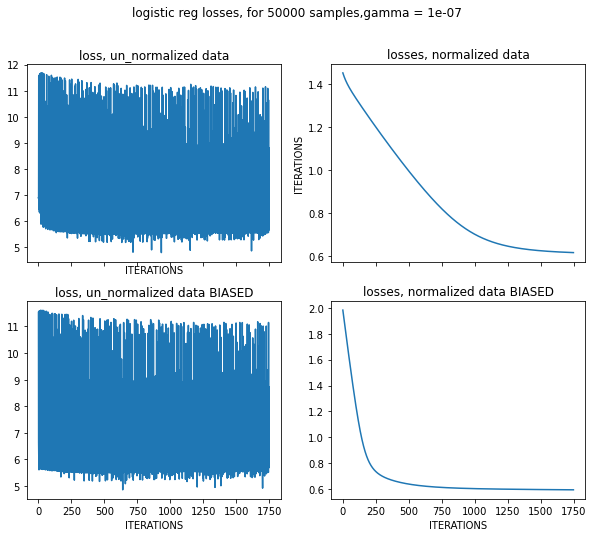

In [186]:
fig, axes = plt.subplots(2,2,figsize=(10,8),sharex =True)
ax = axes.ravel()
ax[0].plot(losses)
ax[0].set_title("loss, un_normalized data")
ax[1].plot(losses_std)
ax[1].set_title("losses, normalized data")
ax[0].set_xlabel("ITERATIONS")
ax[1].set_ylabel("ITERATIONS")

ax[2].plot(losses_b)
ax[2].set_title("loss, un_normalized data BIASED")
ax[3].plot(losses_std_b)
ax[3].set_title("losses, normalized data BIASED")
ax[2].set_xlabel("ITERATIONS")
ax[3].set_xlabel("ITERATIONS")
fig.suptitle("logistic reg losses, for {} samples,gamma = {}".format(n_samples,gamma))

In [167]:
lambda_= 7e-3
#4 OUTPUTS : 
#1) normal input, no bias
w_logR, lossR, lossesR = reg_logistic_regression(y_sampled,lambda_,
                                          tx_sampled,w0,
                                          n_iters, gamma)
#2) normalized input, no bias
w_logstdR, loss_stdR, losses_stdR = reg_logistic_regression(y_normal,lambda_,
                                                    tx_normal,
                                                    w0, n_iters,
                                                    gamma)
#3) normal input, with bias
w_log_bR, loss_bR, losses_bR = reg_logistic_regression(y_sampled,lambda_,
                                          tx_sampled_bias,w0_bias,
                                          n_iters, gamma)

#4) normalized input, with bias
w_logstd_bR, loss_std_bR, losses_std_bR = reg_logistic_regression(y_normal,lambda_,
                                                    tx_normal_bias,
                                                    w0_bias, n_iters,
                                                    gamma)


AttributeError: 'float' object has no attribute 'dot'

## Generate predictions and save ouput in csv format for submission:

In [187]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [188]:
#pre processing
tX_test, _, _ = standardize(tX_test)
#adding bias for biased input
tX_test_bias = np.c_[np.ones((tX_test.shape[0],1)),tX_test]


In [189]:
OUTPUT_PATH = '../output/' # TODO: fill in desired name of output file for submission
y_pred = predict_labels_log(w_logstd, tX_test)
y_pred_bias = predict_labels_log(w_logstd_b, tX_test_bias)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH+"logistic.csv")
create_csv_submission(ids_test, y_pred, OUTPUT_PATH+"logistic_bias.csv")